# Initialization

In [1]:
import pandas as pd
import numpy as np
import xlrd
import openpyxl 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Open files

In [2]:
map_file = "muscle_map.xlsx"

In [3]:
###### First sheet : DOFs mapping
DOF_map = pd.read_excel(map_file, "DOFs", header=[0, 1, 2])
# cleaning
single_header_cols = ['Name', 'Abbreviation', 'Begin', 'End', 'Group', 'Correspondance']  # Adjust this list based on your file
multi_header_cols = [col for col in DOF_map.columns if col[0] not in single_header_cols]

# Step 3: Create single-level headers for specified columns
# Flatten single-header columns by taking the first level
DOF_map.columns = pd.MultiIndex.from_tuples(
    [(col[0], '', '') if col[0] in single_header_cols else col for col in DOF_map.columns]
)

# Step 4: Drop empty levels for single-header columns
DOF_map.columns = pd.MultiIndex.from_tuples(
    [(col[0], col[1], col[2]) if col[0] not in single_header_cols else (col[0], '', '')
     for col in DOF_map.columns]
)

In [4]:
####### Second sheet : DOFs mapping (but cleaner)
row_anat_func = pd.read_excel(map_file, "DOFs2")

In [5]:
####### Third sheet : 2D+ map
row_anat_3D_map = pd.read_excel(map_file, "Mapping")

# Maps visualization

## Raw maps

In [6]:
row_anat_func

Name Abbreviation     Begin       End  \
0                  brachioradialis           BR  0.000000  0.666667   
1   extensor carpi radialis longus         ECRL  0.000000  0.666667   
2   extensor carpi radialis brevis         ECRB  0.333333  0.666667   
3               extensor digitorum           ED  0.000000  1.000000   
4           extensor digiti minimi          EDM  0.000000  1.000000   
5           extensor carpi ulnaris          ECU  0.000000  1.000000   
6                        supinator            S  0.000000  0.333333   
7         abductor pollicis longus          APL  0.333333  0.666667   
8         extensor pollicis longus          EPL  0.333333  1.000000   
9         extensor pollicis brevis          EPB  0.333333  1.000000   
10                extensor indicis           EI  0.333333  1.000000   
11           flexor carpi radialis          FCR  0.000000  1.000000   
12            flexor carpi ulnaris          FCU  0.000000  1.000000   
13  flexor digitorum superficialis          FDS  0.000000  1.000000   
14                  pronator teres           PT  0.000000  0.333333   
15                 palmaris longus           PL  0.000000  1.000000   
16              pronator quadratus           PQ  0.666667  1.000000   
17          flexor pollicis longus          FPL  0.000000  1.000000   
18      flexor digitorum profundus          FDP  0.000000  1.000000   
19        superficial radial nerve          SRN  0.000000  1.000000   
20                    median nerve           MN  0.000000  1.000000   
21                     ulnar nerve           UN  0.000000  1.000000   
22  opponens d+B31:S38igiti minimi          ODM  1.000000  1.000000   
23          abductor digiti minimi          ADM  1.000000  1.000000   
24     flexor digiti minimi brevis         FDMB  1.000000  1.000000   
25               dorsal interossei           DI  1.000000  1.000000   
26               palmar interossei           PI  1.000000  1.000000   
27               adductor pollicis           AP  1.000000  1.000000   
28          flexor pollicis brevis          FPB  1.000000  1.000000   
29                 palmaris brevis           PB  1.000000  1.000000   
30                          radius            R  0.000000  1.000000   
31                           ulnar            U  0.000000  1.000000   

   Wrist Pronation Wrist Supination Wrist Flexion Wrist Extension  \
0             True             True           NaN             NaN   
1              NaN              NaN           NaN            True   
2              NaN              NaN           NaN            True   
3              NaN              NaN           NaN            True   
4              NaN              NaN           NaN            True   
5              NaN              NaN           NaN            True   
6              NaN             True           NaN             NaN   
7              NaN              NaN           NaN             NaN   
8              NaN              NaN           NaN             NaN   
9              NaN              NaN           NaN             NaN   
10             NaN              NaN           NaN            True   
11             NaN              NaN          True             NaN   
12             NaN              NaN          True             NaN   
13             NaN              NaN           NaN             NaN   
14            True              NaN           NaN             NaN   
15             NaN              NaN          True             NaN   
16            True              NaN           NaN             NaN   
17             NaN              NaN           NaN             NaN   
18             NaN              NaN          True             NaN   
19            True             True           NaN            True   
20            True              NaN          True             NaN   
21             NaN              NaN          True             NaN   
22             NaN              NaN           NaN             NaN   
23             NaN            

In [7]:
row_anat_3D_map

location    depth             t3    t4        e1    e2    e3   e4      b1  \
0  0.166667     deep             PT    PT      ECRL  ECRL     R    R      ED   
1  0.166667   middle            FDS  ECRL      ECRL  ECRL  ECRB   ED      ED   
2  0.166667  surface  FCR, FDS, SRN    BR        BR    BR  ECRB   ED      ED   
3  0.500000     deep            FPL   FPL       FPL   FPL     R  APL     EPB   
4  0.500000   middle        FCR, MN   FPL       FPL   FPL     R  APL     EPB   
5  0.500000  surface       FCR, SRN    BR  BR, ECRL  ECRL  ECRB   ED      ED   
6       NaN      NaN            top   NaN       ext   NaN   NaN  NaN  bottom   

    b2       b3   b4   i1       i2       i3       i4   t1            t2  
0    S        S  FDP  FDP      FDP       MN       MN  FDS            PT  
1    S        S    U  FDP  UN, FDP      FCU      FCU  FDS           FDS  
2  EDM      ECU  FDP  FDP      FCU      FCU       PL   PL           FCR  
3  EPB      EPB  FDP  FDP      FDP      FDP      FDP  FDP           FPL  
4  EPB  EPL, EI    U  FDP      FDP  FDP, UN  FDS, PL  FDS  FCR, FDS, MN  
5  EDM      ECU  FDP  FDP      FCU  FCU, UN  FDS, PL   PL           FCR  
6  NaN      NaN  NaN  int      NaN      NaN      NaN  top           NaN

## Cleaned maps

In [8]:
# Full map : anat to DOF
anat_func = row_anat_func.set_index('Abbreviation')

# List of anatomical parts
list_anat = list(anat_func.index.values)

# Create a map containing only the DOFs (without extra indications)
single_header_cols = ['Name', 'Begin', 'End', 'Group', 'Correspondance']
anat_func_DOFs = anat_func.drop(single_header_cols, axis=1)
anat_func_DOFs = anat_func_DOFs.fillna(False)

# Create a map without the DOFs
anat_func_dim = anat_func[single_header_cols]

In [9]:
anat_func_DOFs

Wrist Pronation  Wrist Supination  Wrist Flexion  \
Abbreviation                                                     
BR                       True              True          False   
ECRL                    False             False          False   
ECRB                    False             False          False   
ED                      False             False          False   
EDM                     False             False          False   
ECU                     False             False          False   
S                       False              True          False   
APL                     False             False          False   
EPL                     False             False          False   
EPB                     False             False          False   
EI                      False             False          False   
FCR                     False             False           True   
FCU                     False             False           True   
FDS                     False             False          False   
PT                       True             False          False   
PL                      False             False           True   
PQ                       True             False          False   
FPL                     False             False          False   
FDP                     False             False           True   
SRN                      True              True          False   
MN                       True             False           True   
UN                      False             False           True   
ODM                     False             False          False   
ADM                     False             False          False   
FDMB                    False             False          False   
DI                      False             False          False   
PI                      False             False          False   
AP                      False             False          False   
FPB                     False             False          False   
PB                      False             False          False   
R                       False             False          False   
U                       False             False          False   

              Wrist Extension  Thumb Adduction  Thumb Abduction  \
Abbreviation                                                      
BR                      False            False            False   
ECRL                     True            False            False   
ECRB                     True            False            False   
ED                       True            False            False   
EDM                      True            False            False   
ECU                      True            False            False   
S                       False            False            False   
APL                     False            False             True   
EPL                     False            False            False   
EPB                     False            False            False   
EI                       True            False            False   
FCR                     False            False            False   
FCU                     False            False            False   
FDS                     False            False            False   
PT                      False            False            False   
PL                      False            False            False   
PQ                      False            False            False   
FPL                     False            False            False   
FDP                     False            False            False   
SRN                      True            False             True   
MN                      False            False            False   
UN                      False             True            False   
ODM                     False            False            False   
ADM                     False            False            False   
FDMB                    Fal

In [10]:
anat_func_dim

Name     Begin       End  \
Abbreviation                                                       
BR                           brachioradialis  0.000000  0.666667   
ECRL          extensor carpi radialis longus  0.000000  0.666667   
ECRB          extensor carpi radialis brevis  0.333333  0.666667   
ED                        extensor digitorum  0.000000  1.000000   
EDM                   extensor digiti minimi  0.000000  1.000000   
ECU                   extensor carpi ulnaris  0.000000  1.000000   
S                                  supinator  0.000000  0.333333   
APL                 abductor pollicis longus  0.333333  0.666667   
EPL                 extensor pollicis longus  0.333333  1.000000   
EPB                 extensor pollicis brevis  0.333333  1.000000   
EI                          extensor indicis  0.333333  1.000000   
FCR                    flexor carpi radialis  0.000000  1.000000   
FCU                     flexor carpi ulnaris  0.000000  1.000000   
FDS           flexor digitorum superficialis  0.000000  1.000000   
PT                            pronator teres  0.000000  0.333333   
PL                           palmaris longus  0.000000  1.000000   
PQ                        pronator quadratus  0.666667  1.000000   
FPL                   flexor pollicis longus  0.000000  1.000000   
FDP               flexor digitorum profundus  0.000000  1.000000   
SRN                 superficial radial nerve  0.000000  1.000000   
MN                              median nerve  0.000000  1.000000   
UN                               ulnar nerve  0.000000  1.000000   
ODM           opponens d+B31:S38igiti minimi  1.000000  1.000000   
ADM                   abductor digiti minimi  1.000000  1.000000   
FDMB             flexor digiti minimi brevis  1.000000  1.000000   
DI                         dorsal interossei  1.000000  1.000000   
PI                         palmar interossei  1.000000  1.000000   
AP                         adductor pollicis  1.000000  1.000000   
FPB                   flexor pollicis brevis  1.000000  1.000000   
PB                           palmaris brevis  1.000000  1.000000   
R                                     radius  0.000000  1.000000   
U                                      ulnar  0.000000  1.000000   

                           Group  \
Abbreviation                       
BR                    mobile wad   
ECRL                  mobile wad   
ECRB                  mobile wad   
ED            superficial dorsal   
EDM           superficial dorsal   
ECU           superficial dorsal   
S                    deep dorsal   
APL                  deep dorsal   
EPL                  deep dorsal   
EPB                  deep dorsal   
EI                   deep dorsal   
FCR            superficial volar   
FCU            superficial volar   
FDS            superficial volar   
PT             superficial volar   
PL             superficial volar   
PQ                    deep volar   
FPL                   deep volar   
FDP                   deep volar   
SRN                       nerves   
MN                        nerves   
UN                        nerves   
ODM                         hand   
ADM                         hand   
FDMB                        hand   
DI                          hand   
PI                          hand   
AP                          hand   
FPB                         hand   
PB                          hand   
R                          bones   
U                          bones   

                                                 Correspondance  
Abbreviation                                                     
BR                                                          NaN  
ECRL                                                        NaN  
ECRB                                                        NaN  
ED                                                          NaN  
EDM                                                         NaN  
ECU                                     

In [11]:
# Full map : 3D to anat
anat_3D_map = row_anat_3D_map.drop(6,axis=0)
anat_3D_map = anat_3D_map.set_index(['location','depth'])

In [12]:
anat_3D_map

t3    t4        e1    e2    e3   e4   b1   b2  \
location depth                                                               
0.166667 deep                PT    PT      ECRL  ECRL     R    R   ED    S   
         middle             FDS  ECRL      ECRL  ECRL  ECRB   ED   ED    S   
         surface  FCR, FDS, SRN    BR        BR    BR  ECRB   ED   ED  EDM   
0.500000 deep               FPL   FPL       FPL   FPL     R  APL  EPB  EPB   
         middle         FCR, MN   FPL       FPL   FPL     R  APL  EPB  EPB   
         surface       FCR, SRN    BR  BR, ECRL  ECRL  ECRB   ED   ED  EDM   

                       b3   b4   i1       i2       i3       i4   t1  \
location depth                                                        
0.166667 deep           S  FDP  FDP      FDP       MN       MN  FDS   
         middle         S    U  FDP  UN, FDP      FCU      FCU  FDS   
         surface      ECU  FDP  FDP      FCU      FCU       PL   PL   
0.500000 deep         EPB  FDP  FDP      FDP      FDP      FDP  FDP   
         middle   EPL, EI    U  FDP      FDP  FDP, UN  FDS, PL  FDS   
         surface      ECU  FDP  FDP      FCU  FCU, UN  FDS, PL   PL   

                            t2  
location depth                  
0.166667 deep               PT  
         middle            FDS  
         surface           FCR  
0.500000 deep              FPL  
         middle   FCR, FDS, MN  
         surface           FCR

# Tests

In [13]:
# DOFs available for part x
part1 = [0, 1/3]
part2 = [1/3, 2/3]
part3 = [2/3, 1]

part = [0.0, 1/2]

# list of available anatomical part
anat_available = []
abv = []
index_available = []
for index, row in DOF_map.iterrows():
    begin = float(row['Begin'])
    end = float(row['End'])
    if (begin <= part[0]) & (end >= part[1]):
        anat_available.append(str(row['Name']))
        abv.append(str(row['Abbreviation']))
        index_available.append(index)
    
#anat_available
print(index_available)

# list of available DOFs

#DOF_map[DOF_map['DOF', 'Wrist', 'Extension'] == True].index.tolist()
nb_DOFs = 14
wrist_DOFs = ['Pronation','Supination','Flexion','Extension']
thumb_DOFs = ['Adduction','Abduction','Flexion','Extension']
finger_DOFs = ['Flexion','Extension']

list_DOFs = [False for i in range(nb_DOFs)]

#for index in index_available:
#    print(DOF_map[index, 'DOF'])
DOF_map.iloc[31]['DOF']
for elem in DOF_map.iloc[31]['DOF']:
    print(elem)

[0, 1, 3, 4, 5, 11, 12, 13, 15, 17, 18, 19, 20, 21, 30, 31]
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [14]:
location = 0.3

# list of available anatomical part
anat_available = []
abv = []
index_available = []
for index, row in row_anat_func.iterrows():
    begin = float(row['Begin'])
    end = float(row['End'])
    if (begin <= location) & (end >= location):
        anat_available.append(str(row['Name']))
        abv.append(str(row['Abbreviation']))
        index_available.append(index)

        
DOF_map2_only = row_anat_func.drop(single_header_cols, axis=1)
DOF_map2_available = DOF_map2_only.iloc[index_available]
    
list_DOFs = []
count_DOFs = []  

for column in DOF_map2_available:
    if True in DOF_map2_available[column]:
        list_DOFs.append(True)
    else:
        list_DOFs.append(False)
    count_DOFs.append(DOF_map2_available.value_counts(column))
        
print(list_DOFs)
# all True meaning we can have all the signals we want
print(count_DOFs)
DOF_map2_available

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[Abbreviation
BR      1
ECRL    1
U       1
SRN     1
S       1
R       1
PT      1
PL      1
MN      1
FPL     1
FDS     1
FDP     1
FCU     1
FCR     1
EDM     1
ED      1
ECU     1
UN      1
dtype: int64, Wrist Pronation
True    4
dtype: int64, Wrist Supination
True    3
dtype: int64, Wrist Flexion
True    6
dtype: int64, Wrist Extension
True    5
dtype: int64, Thumb Adduction
True    1
dtype: int64, Thumb Abduction
True    1
dtype: int64, Thumb Flexion
True    2
dtype: int64, Thumb Extension
True    1
dtype: int64, Index Flexion
True    4
dtype: int64, Index Extension
True    3
dtype: int64, Middle Flexion
True    4
dtype: int64, Middle Extension
True    2
dtype: int64, Ring Pinky Flexion
True    4
dtype: int64, Ring Pinky Extension
True    4
dtype: int64]


Abbreviation Wrist Pronation Wrist Supination Wrist Flexion  \
0            BR            True             True           NaN   
1          ECRL             NaN              NaN           NaN   
3            ED             NaN              NaN           NaN   
4           EDM             NaN              NaN           NaN   
5           ECU             NaN              NaN           NaN   
6             S             NaN             True           NaN   
11          FCR             NaN              NaN          True   
12          FCU             NaN              NaN          True   
13          FDS             NaN              NaN           NaN   
14           PT            True              NaN           NaN   
15           PL             NaN              NaN          True   
17          FPL             NaN              NaN           NaN   
18          FDP             NaN              NaN          True   
19          SRN            True             True           NaN   
20           MN            True              NaN          True   
21           UN             NaN              NaN          True   
30            R             NaN              NaN           NaN   
31            U             NaN              NaN           NaN   

   Wrist Extension Thumb Adduction Thumb Abduction Thumb Flexion  \
0              NaN             NaN             NaN           NaN   
1             True             NaN             NaN           NaN   
3             True             NaN             NaN           NaN   
4             True             NaN             NaN           NaN   
5             True             NaN             NaN           NaN   
6              NaN             NaN             NaN           NaN   
11             NaN             NaN             NaN           NaN   
12             NaN             NaN             NaN           NaN   
13             NaN             NaN             NaN           NaN   
14             NaN             NaN             NaN           NaN   
15             NaN             NaN             NaN           NaN   
17             NaN             NaN             NaN          True   
18             NaN             NaN             NaN           NaN   
19            True             NaN            True           NaN   
20             NaN             NaN             NaN           NaN   
21             NaN            True             NaN          True   
30             NaN             NaN             NaN           NaN   
31             NaN             NaN             NaN           NaN   

   Thumb Extension Index Flexion Index Extension Middle Flexion  \
0              NaN           NaN             NaN            NaN   
1              NaN           NaN             NaN            NaN   
3              NaN           NaN            True            NaN   
4              NaN           NaN             NaN            NaN   
5              NaN           NaN             NaN            NaN   
6              NaN           NaN             NaN            NaN   
11             NaN           NaN             NaN            NaN   
12             NaN           NaN             NaN            NaN   
13             NaN          True             NaN           True   
14             NaN           NaN             NaN            NaN   
15             NaN           NaN             NaN            NaN   
17             NaN           NaN             NaN            NaN   
18             NaN          True             NaN           True   
19            True           NaN            True            NaN   
20             NaN          True             NaN           True   
21             NaN          True            True           True   
30             NaN           NaN             NaN            NaN   
31             NaN           NaN             NaN            NaN   

   Middle Extension Ring Pinky Flexion Ring Pinky Extension  
0               NaN                NaN                  NaN  
1               NaN                NaN                  N

# Useful functions

## Number of anatomical parts for each DOF depending on the electrode location (use DOF_map)

In [15]:
def available_anat(anat_df, location):
    index_available = []
    for index, row in anat_df.iterrows():
        begin = float(row['Begin'])
        end = float(row['End'])
        if (begin <= location) & (end >= location):
            index_available.append(index)
    return index_available
    
def count_DOFs_parts(anat_df, DOFs_df, location):

    # Available anatomical parts
    index_available = available_anat(anat_func_dim, location)
    print(index_available)
    # Filter DOF map : take only rows corresponding to available anat. parts
    DOFs_available = DOFs_df.copy()
    for i in range(len(list_anat)):
        if list_anat[i] not in index_available:
            DOFs_available = DOFs_available.drop(list_anat[i], axis=0)

    # Count number of available anat. parts for each DOF
    list_DOFs = []
    count_DOFs = []  
    for column in DOFs_available:
        count_DOFs.append(DOFs_available.value_counts(column))

    print(count_DOFs)
    
count_DOFs_parts(anat_func_dim, anat_func_DOFs, 0.0)
print('\n')
count_DOFs_parts(anat_func_dim, anat_func_DOFs, 0.5)

['BR', 'ECRL', 'ED', 'EDM', 'ECU', 'S', 'FCR', 'FCU', 'FDS', 'PT', 'PL', 'FPL', 'FDP', 'SRN', 'MN', 'UN', 'R', 'U']
[Wrist Pronation
False    14
True      4
dtype: int64, Wrist Supination
False    15
True      3
dtype: int64, Wrist Flexion
False    12
True      6
dtype: int64, Wrist Extension
False    13
True      5
dtype: int64, Thumb Adduction
False    17
True      1
dtype: int64, Thumb Abduction
False    17
True      1
dtype: int64, Thumb Flexion
False    16
True      2
dtype: int64, Thumb Extension
False    17
True      1
dtype: int64, Index Flexion
False    14
True      4
dtype: int64, Index Extension
False    15
True      3
dtype: int64, Middle Flexion
False    14
True      4
dtype: int64, Middle Extension
False    16
True      2
dtype: int64, Ring Pinky Flexion
False    14
True      4
dtype: int64, Ring Pinky Extension
False    14
True      4
dtype: int64]


['BR', 'ECRL', 'ECRB', 'ED', 'EDM', 'ECU', 'APL', 'EPL', 'EPB', 'EI', 'FCR', 'FCU', 'FDS', 'PL', 'FPL', 'FDP', 'SRN', 'MN'

## Interpolation to extend the 2D+ map

In [16]:
anat_func_DOFs

Wrist Pronation  Wrist Supination  Wrist Flexion  \
Abbreviation                                                     
BR                       True              True          False   
ECRL                    False             False          False   
ECRB                    False             False          False   
ED                      False             False          False   
EDM                     False             False          False   
ECU                     False             False          False   
S                       False              True          False   
APL                     False             False          False   
EPL                     False             False          False   
EPB                     False             False          False   
EI                      False             False          False   
FCR                     False             False           True   
FCU                     False             False           True   
FDS                     False             False          False   
PT                       True             False          False   
PL                      False             False           True   
PQ                       True             False          False   
FPL                     False             False          False   
FDP                     False             False           True   
SRN                      True              True          False   
MN                       True             False           True   
UN                      False             False           True   
ODM                     False             False          False   
ADM                     False             False          False   
FDMB                    False             False          False   
DI                      False             False          False   
PI                      False             False          False   
AP                      False             False          False   
FPB                     False             False          False   
PB                      False             False          False   
R                       False             False          False   
U                       False             False          False   

              Wrist Extension  Thumb Adduction  Thumb Abduction  \
Abbreviation                                                      
BR                      False            False            False   
ECRL                     True            False            False   
ECRB                     True            False            False   
ED                       True            False            False   
EDM                      True            False            False   
ECU                      True            False            False   
S                       False            False            False   
APL                     False            False             True   
EPL                     False            False            False   
EPB                     False            False            False   
EI                       True            False            False   
FCR                     False            False            False   
FCU                     False            False            False   
FDS                     False            False            False   
PT                      False            False            False   
PL                      False            False            False   
PQ                      False            False            False   
FPL                     False            False            False   
FDP                     False            False            False   
SRN                      True            False             True   
MN                      False            False            False   
UN                      False             True            False   
ODM                     False            False            False   
ADM                     False            False            False   
FDMB                    Fal

## 3D availibility map of all DOF

In [17]:
def mapping_anat2DOFs(anat_part, DOFs_df):
    row = DOFs_df.loc[anat_part]
    DOFs = [col for col in DOFs_df.columns if row[col]==True]
    return DOFs

DOFs_3D_map = anat_3D_map.copy(deep=True)
for row in DOFs_3D_map.index:
    for col in DOFs_3D_map.columns:
        box = DOFs_3D_map.loc[row,col]
        if pd.notnull(box):
            box_list = [bx.strip() for bx in box.split(', ')]
            
            box_DOFs = []
            for anat_part in box_list:
                DOFs = mapping_anat2DOFs(anat_part, anat_func_DOFs)
                box_DOFs.extend(DOFs)
            
            DOFs_3D_map.loc[row, col] = box_DOFs
            
DOFs_3D_map

t3  \
location depth                                                        
0.166667 deep                                     [Wrist Pronation]   
         middle   [Index Flexion, Middle Flexion, Ring Pinky Fle...   
         surface  [Wrist Flexion, Index Flexion, Middle Flexion,...   
0.500000 deep                                       [Thumb Flexion]   
         middle   [Wrist Flexion, Wrist Pronation, Wrist Flexion...   
         surface  [Wrist Flexion, Wrist Pronation, Wrist Supinat...   

                                                   t4  \
location depth                                          
0.166667 deep                       [Wrist Pronation]   
         middle                     [Wrist Extension]   
         surface  [Wrist Pronation, Wrist Supination]   
0.500000 deep                         [Thumb Flexion]   
         middle                       [Thumb Flexion]   
         surface  [Wrist Pronation, Wrist Supination]   

                                                                 e1  \
location depth                                                        
0.166667 deep                                     [Wrist Extension]   
         middle                                   [Wrist Extension]   
         surface                [Wrist Pronation, Wrist Supination]   
0.500000 deep                                       [Thumb Flexion]   
         middle                                     [Thumb Flexion]   
         surface  [Wrist Pronation, Wrist Supination, Wrist Exte...   

                                                   e2                 e3  \
location depth                                                             
0.166667 deep                       [Wrist Extension]                 []   
         middle                     [Wrist Extension]  [Wrist Extension]   
         surface  [Wrist Pronation, Wrist Supination]  [Wrist Extension]   
0.500000 deep                         [Thumb Flexion]                 []   
         middle                       [Thumb Flexion]                 []   
         surface                    [Wrist Extension]  [Wrist Extension]   

                                                                 e4  \
location depth                                                        
0.166667 deep                                                    []   
         middle   [Wrist Extension, Index Extension, Middle Exte...   
         surface  [Wrist Extension, Index Extension, Middle Exte...   
0.500000 deep                    [Thumb Abduction, Thumb Extension]   
         middle                  [Thumb Abduction, Thumb Extension]   
         surface  [Wrist Extension, Index Extension, Middle Exte...   

                                                                 b1  \
location depth                                                        
0.166667 deep     [Wrist Extension, Index Extension, Middle Exte...   
         middle   [Wrist Extension, Index Extension, Middle Exte...   
         surface  [Wrist Extension, Index Extension, Middle Exte...   
0.500000 deep                                     [Thumb Extension]   
         middle                                   [Thumb Extension]   
         surface  [Wrist Extension, Index Extension, Middle Exte...   

                                                       b2  \
location depth                                              
0.166667 deep                          [Wrist Supination]   
         middle                        [Wrist Supination]   
         surface  [Wrist Extension, Ring Pinky Extension]   
0.500000 deep                           [Thumb Extension]   
         middle                         [Thumb Extension]   
         surface  [Wrist Extension, Ring Pinky Extension]   

                                                                 b3  \
location depth                                                        
0.166667 deep                                    [Wrist Supination]   
         middle      

## Flattened 2D map (simple version -> complete version with weights for each depth ?)

In [18]:
def flatten_nested_list(nested_list):
    flat_list = []
    for item in nested_list:
        if isinstance(item, list):
            flat_list.extend(flatten_nested_list(item)) 
        else:
            flat_list.append(item)
    return flat_list

flattened_data = {}

locations = DOFs_3D_map.index.get_level_values('location')

for location in locations:
    flattened_data[location] = {}
    
    for x_col in DOFs_3D_map.columns:
        depth_values = DOFs_3D_map.loc[location, x_col].values
        
        combined_list = []
        for depth_value in depth_values:
            if pd.notnull(depth_value).any:
                flattened_values = flatten_nested_list(depth_value)
                combined_list.extend(flattened_values)
        
        flattened_data[location][x_col] = ', '.join(combined_list)

df_flattened = pd.DataFrame(flattened_data).T 
df_flattend = df_flattened.rename_axis('location')
df_flattened

t3  \
0.166667  Wrist Pronation, Index Flexion, Middle Flexion...   
0.500000  Thumb Flexion, Wrist Flexion, Wrist Pronation,...   

                                                         t4  \
0.166667  Wrist Pronation, Wrist Extension, Wrist Pronat...   
0.500000  Thumb Flexion, Thumb Flexion, Wrist Pronation,...   

                                                         e1  \
0.166667  Wrist Extension, Wrist Extension, Wrist Pronat...   
0.500000  Thumb Flexion, Thumb Flexion, Wrist Pronation,...   

                                                         e2  \
0.166667  Wrist Extension, Wrist Extension, Wrist Pronat...   
0.500000      Thumb Flexion, Thumb Flexion, Wrist Extension   

                                        e3  \
0.166667  Wrist Extension, Wrist Extension   
0.500000                   Wrist Extension   

                                                         e4  \
0.166667  Wrist Extension, Index Extension, Middle Exten...   
0.500000  Thumb Abduction, Thumb Extension, Thumb Abduct...   

                                                         b1  \
0.166667  Wrist Extension, Index Extension, Middle Exten...   
0.500000  Thumb Extension, Thumb Extension, Wrist Extens...   

                                                         b2  \
0.166667  Wrist Supination, Wrist Supination, Wrist Exte...   
0.500000  Thumb Extension, Thumb Extension, Wrist Extens...   

                                                         b3  \
0.166667  Wrist Supination, Wrist Supination, Wrist Exte...   
0.500000  Thumb Extension, Thumb Extension, Wrist Extens...   

                                                         b4  \
0.166667  Wrist Flexion, Index Flexion, Middle Flexion, ...   
0.500000  Wrist Flexion, Index Flexion, Middle Flexion, ...   

                                                         i1  \
0.166667  Wrist Flexion, Index Flexion, Middle Flexion, ...   
0.500000  Wrist Flexion, Index Flexion, Middle Flexion, ...   

                                                         i2  \
0.166667  Wrist Flexion, Index Flexion, Middle Flexion, ...   
0.500000  Wrist Flexion, Index Flexion, Middle Flexion, ...   

                                                         i3  \
0.166667  Wrist Pronation, Wrist Flexion, Index Flexion,...   
0.500000  Wrist Flexion, Index Flexion, Middle Flexion, ...   

                                                         i4  \
0.166667  Wrist Pronation, Wrist Flexion, Index Flexion,...   
0.500000  Wrist Flexion, Index Flexion, Middle Flexion, ...   

                                                         t1  \
0.166667  Index Flexion, Middle Flexion, Ring Pinky Flex...   
0.500000  Wrist Flexion, Index Flexion, Middle Flexion, ...   

                                                         t2  
0.166667  Wrist Pronation, Index Flexion, Middle Flexion...  
0.500000  Thumb Flexion, Wrist Flexion, Index Flexion, M...

## Count of a single DOF map

In [19]:
def numerical_availibility_map(selected_dof):
    # Initialize a dictionary to store counts of selected_dof at each (location, depth) pair
    occurrences = {}

    # Populate the dictionary with counts of selected_dof
    for location, row in df_flattened.iterrows():
        for depth, values in row.items():
            DOFs_list = values.split(', ')
            if selected_dof in DOFs_list:
                occurrences[(location, depth)] = DOFs_list.count(selected_dof)

    # Extract unique locations and depths to set up the grid
    #locations = sorted(df_flattened.index.unique())
    #depths = sorted(df_flattened.columns.unique())
    
    locations = df_flattened.index
    depths = df_flattened.columns

    # Create a 2D grid of counts for (location, depth) pairs
    count_matrix = np.zeros((len(locations), len(depths)))

    # Fill the count matrix
    for i, location in enumerate(locations):
        for j, depth in enumerate(depths):
            count_matrix[i, j] = occurrences.get((location, depth), 0)

    return count_matrix

avail_map_ThAbd = numerical_availibility_map('Thumb Abduction')
avail_map_WrExt = numerical_availibility_map('Wrist Extension')

print(avail_map_ThAbd)
print(avail_map_WrExt)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 2. 2. 2. 2. 3. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0.]]


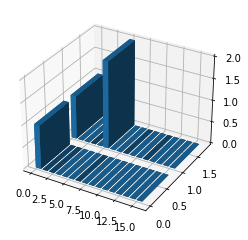

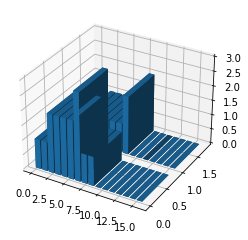

In [20]:
def visualization_availibility_map(count_matrix):
    data_2d = count_matrix

    data_array = np.array(data_2d)
  
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
 
    x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                                  np.arange(data_array.shape[0]) )
    #
    x_data = x_data.flatten()
    y_data = y_data.flatten()
    z_data = data_array.flatten()
    ax.bar3d( x_data,
              y_data,
              np.zeros(len(z_data)),
              0.8, 0.8, z_data )

    plt.show()

visualization_availibility_map(avail_map_ThAbd)
visualization_availibility_map(avail_map_WrExt)

In [21]:
def matrix2df(matrix):
    old_columns = [n for n in range(16)]
    new_columns = [col for col in DOFs_3D_map]
    header_map = dict(zip(old_columns,new_columns))
    # Convert the flattened data dictionary to a DataFrame
    df_matrix = pd.DataFrame(matrix)  # Transpose to match original orientation
    df_matrix = df_matrix.rename_axis('axial position')
    df_matrix = df_matrix.rename(header_map, axis='columns')
    # Display the resulting flattened 2D DataFrame
    return df_matrix
    
df = matrix2df(avail_map_ThAbd)
print(df)

matrix2df(avail_map_WrExt)

                 t3   t4   e1   e2   e3   e4   b1   b2   b3   b4   i1   i2  \
axial position                                                               
0               1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1               1.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0   

                 i3   i4   t1   t2  
axial position                      
0               0.0  0.0  0.0  0.0  
1               0.0  0.0  0.0  0.0  


t3   t4   e1   e2   e3   e4   b1   b2   b3   b4   i1   i2  \
axial position                                                               
0               1.0  1.0  2.0  2.0  2.0  2.0  3.0  1.0  1.0  0.0  0.0  0.0   
1               1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  0.0  0.0  0.0   

                 i3   i4   t1   t2  
axial position                      
0               0.0  0.0  0.0  0.0  
1               0.0  0.0  0.0  0.0

In [22]:
def plot_avail_map(df, selected_dof):
    # Get x and y coordinates from column names and index
    x = np.arange(df.shape[1])  # Columns represent x-coordinates
    y = np.arange(df.shape[0])  # Rows represent y-coordinates

    # Width and depth of each bar
    dx = 0.8
    dy = 0.5 # Adjust as needed

    # Create meshgrid for x, y
    xpos, ypos = np.meshgrid(x, y)

    # Flatten the meshgrid arrays and z values from the DataFrame
    xpos = xpos.ravel() - dx/2
    ypos = ypos.ravel() - dy/2
    zpos = np.zeros_like(xpos)

    # Flatten the data for the z-axis heights
    dz = df.values.ravel()

    # Create the figure and 3D axis
    fig = plt.figure(figsize=(20,14))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the bars
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True)

    # Set labels
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')

    # Customizing x and y ticks with your DataFrame labels
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.index)
    
    ax.set_title(selected_dof)

    plt.show()

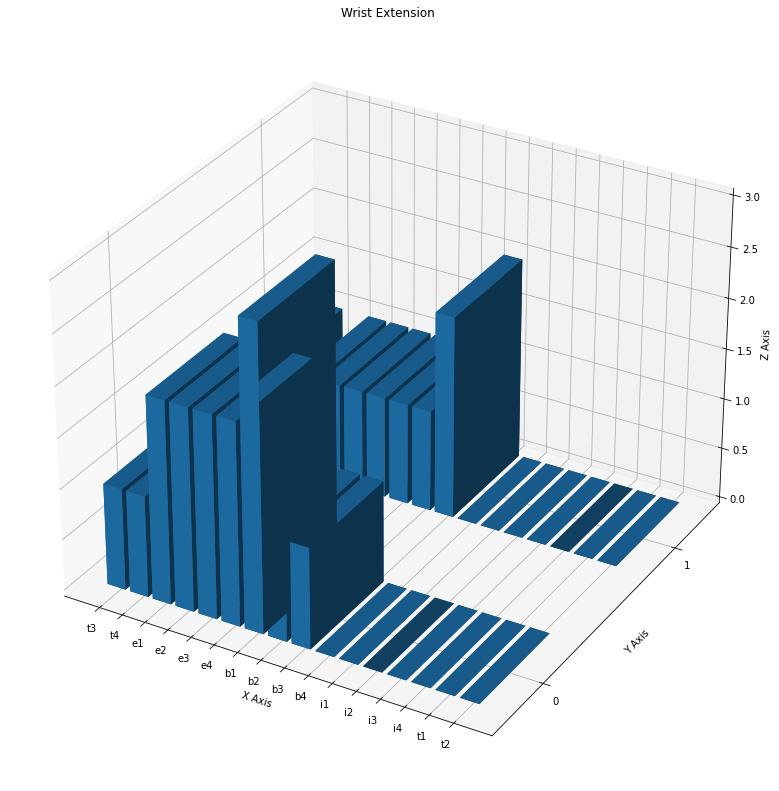

In [23]:
def get_avail_map(selected_dof):
    avail_matrix = numerical_availibility_map(selected_dof)
    avail_df = matrix2df(avail_matrix)
    plot_avail_map(avail_df, selected_dof)
    
get_avail_map("Wrist Extension")

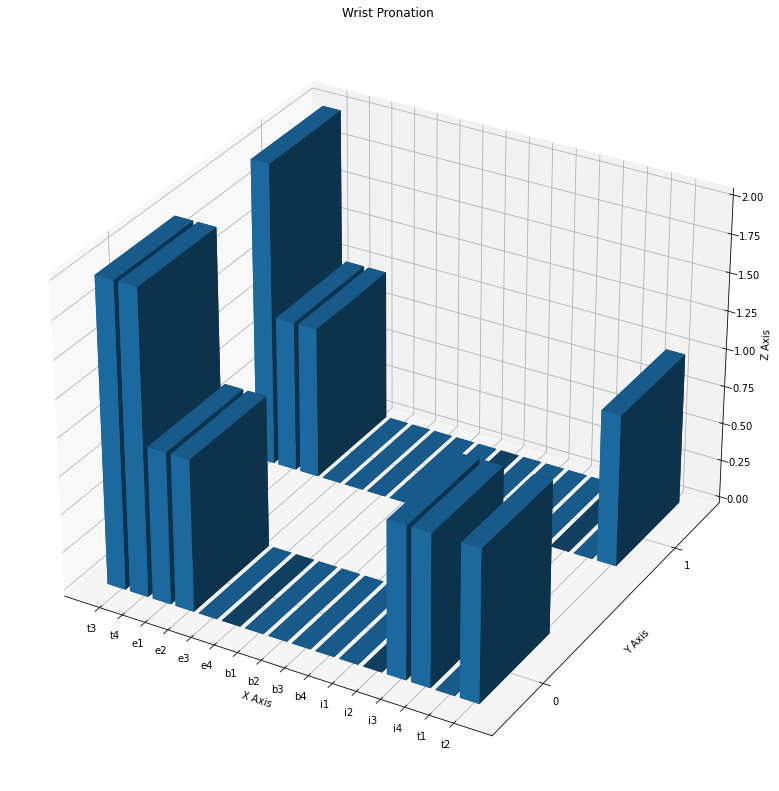

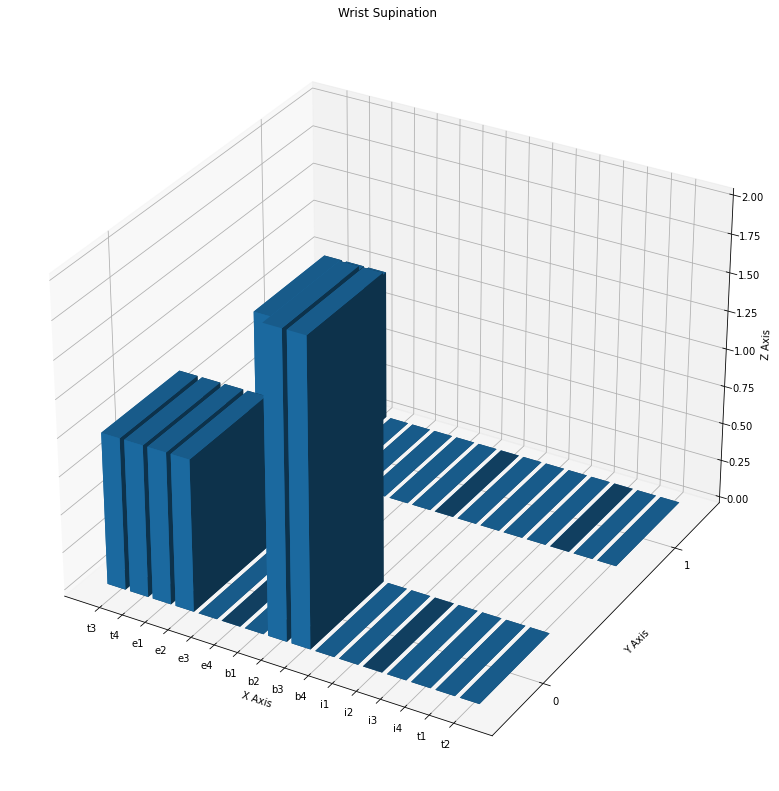

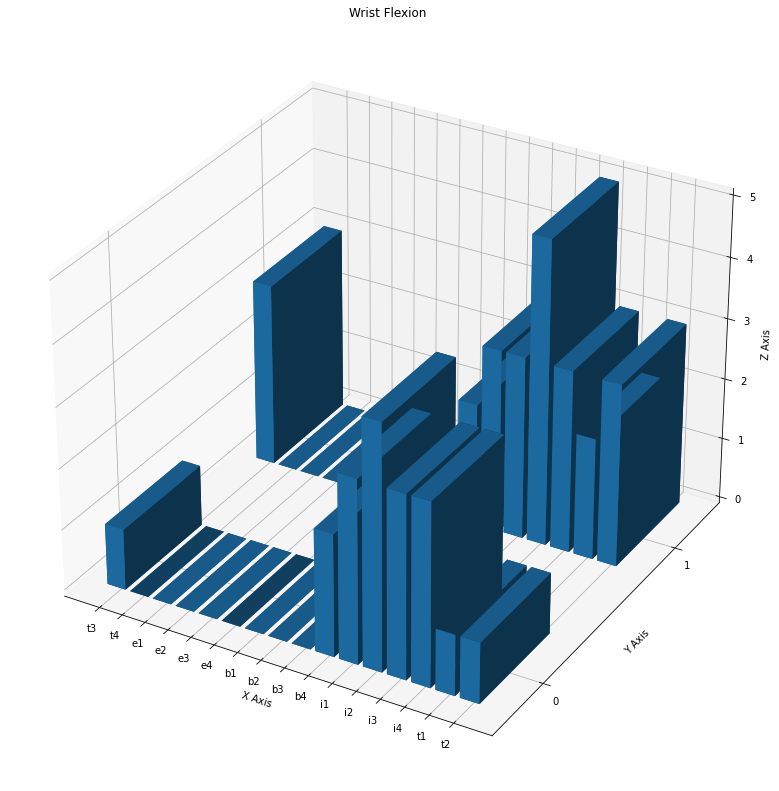

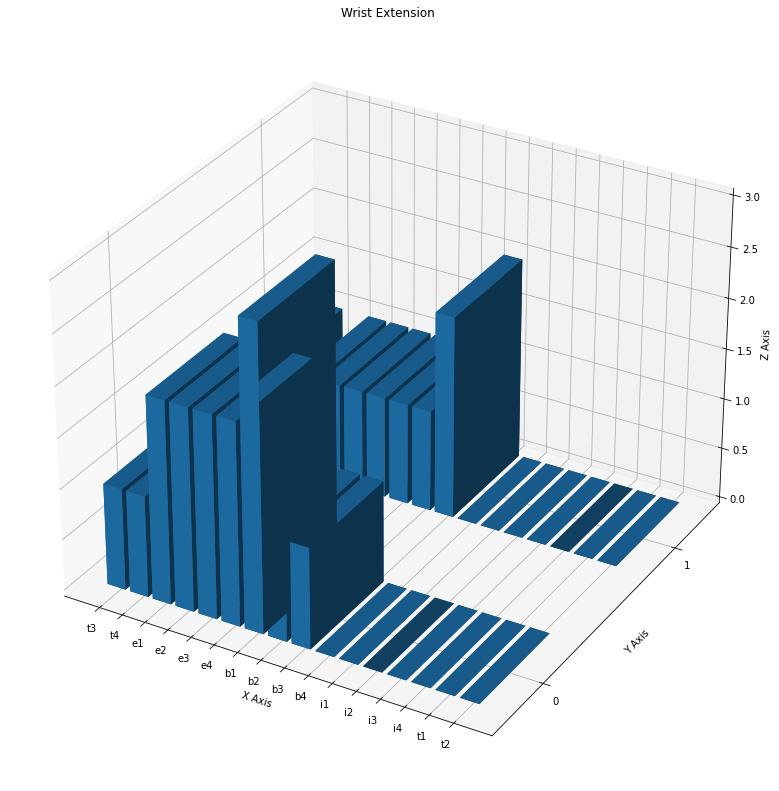

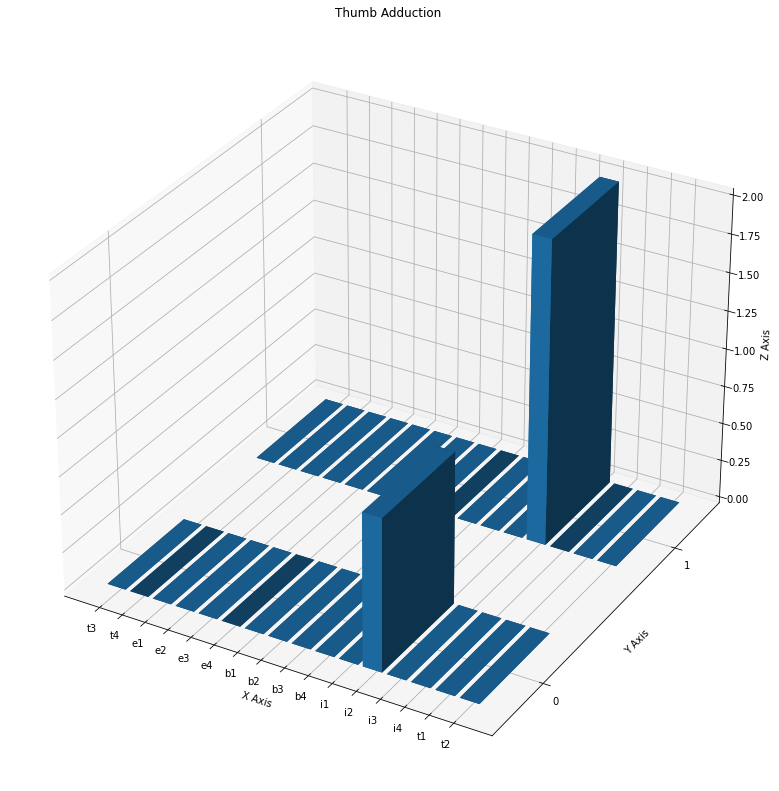

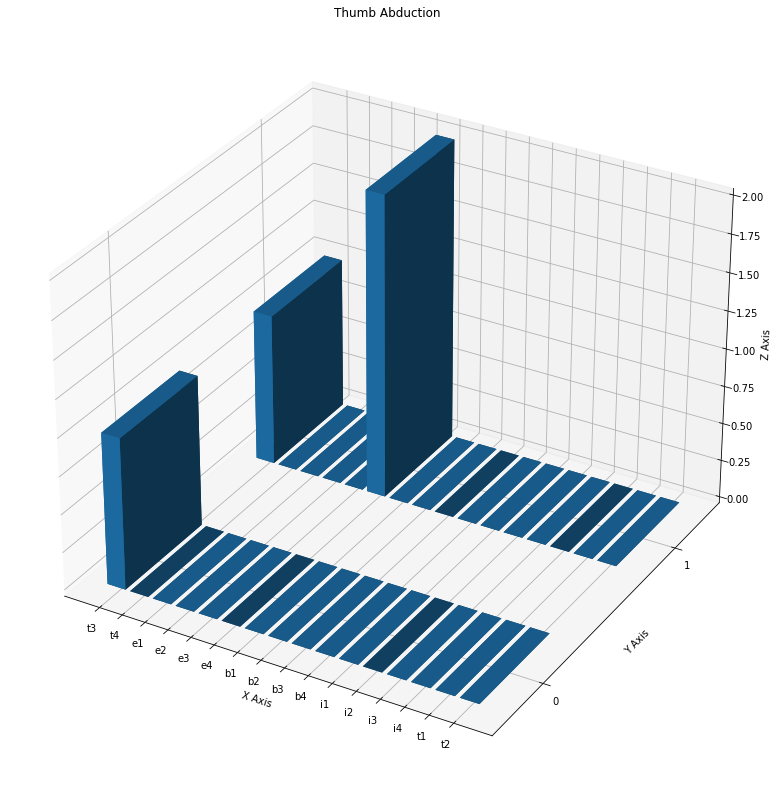

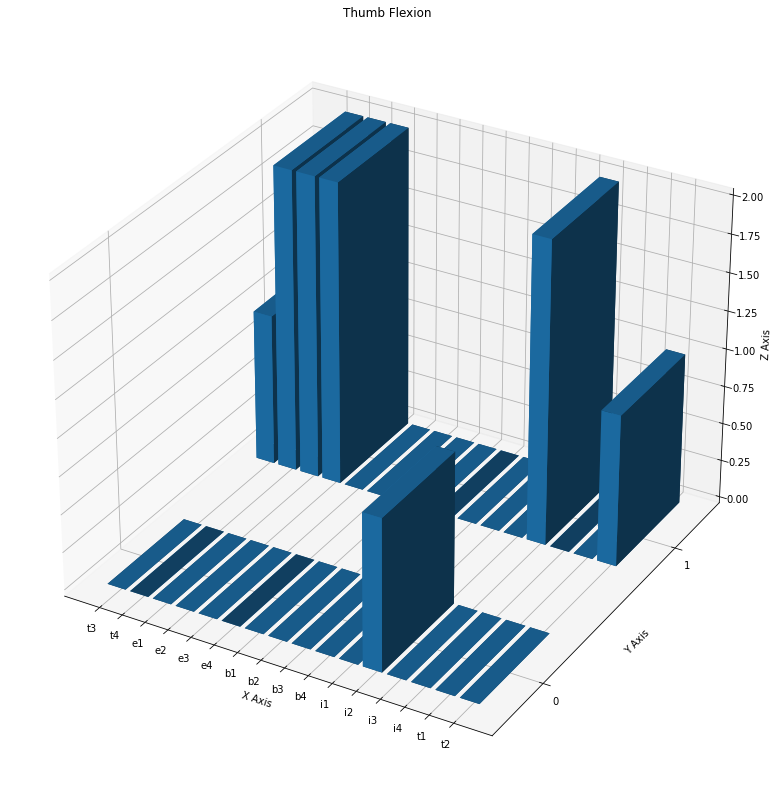

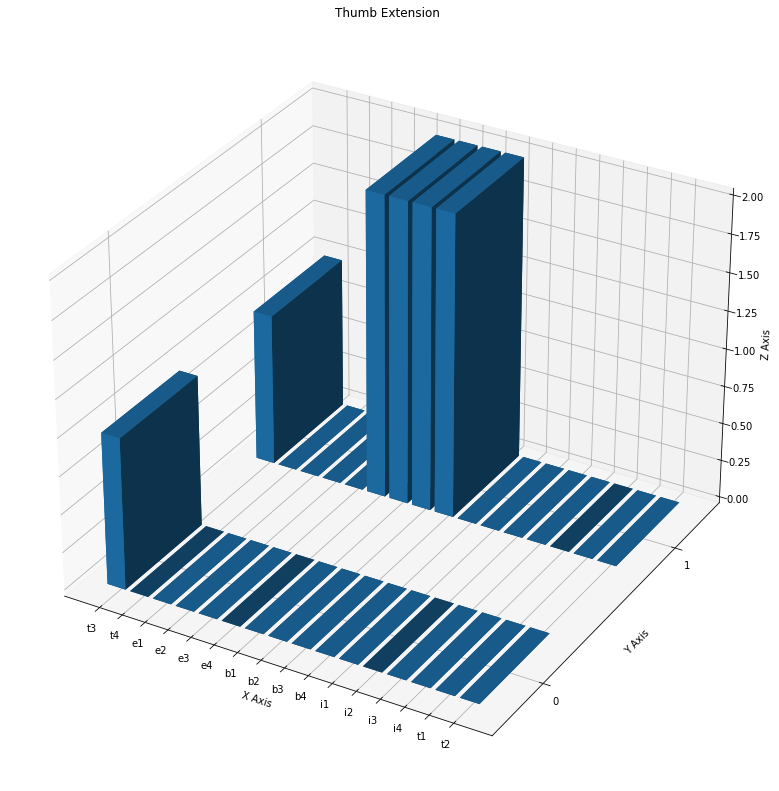

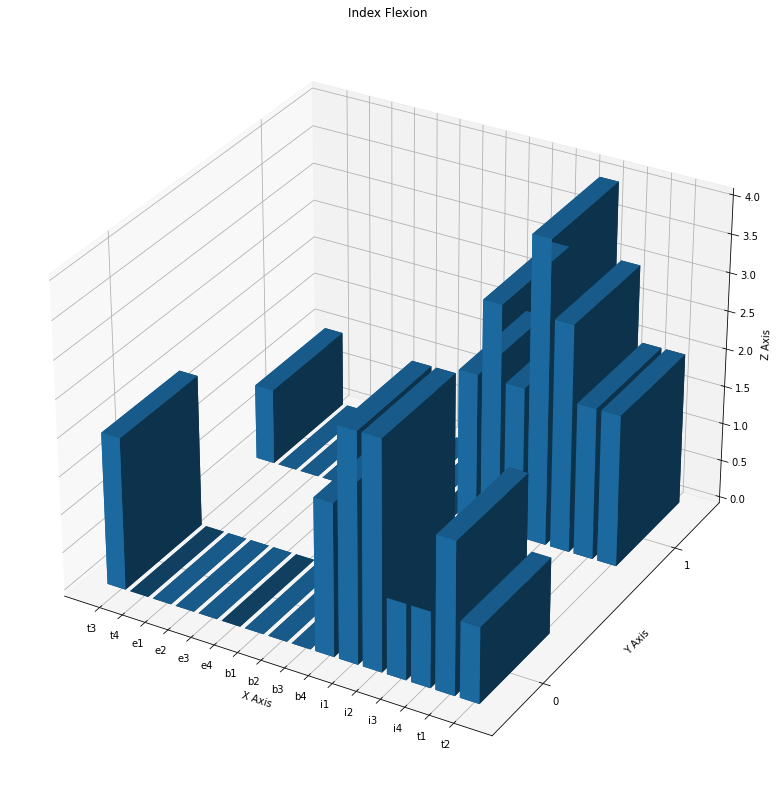

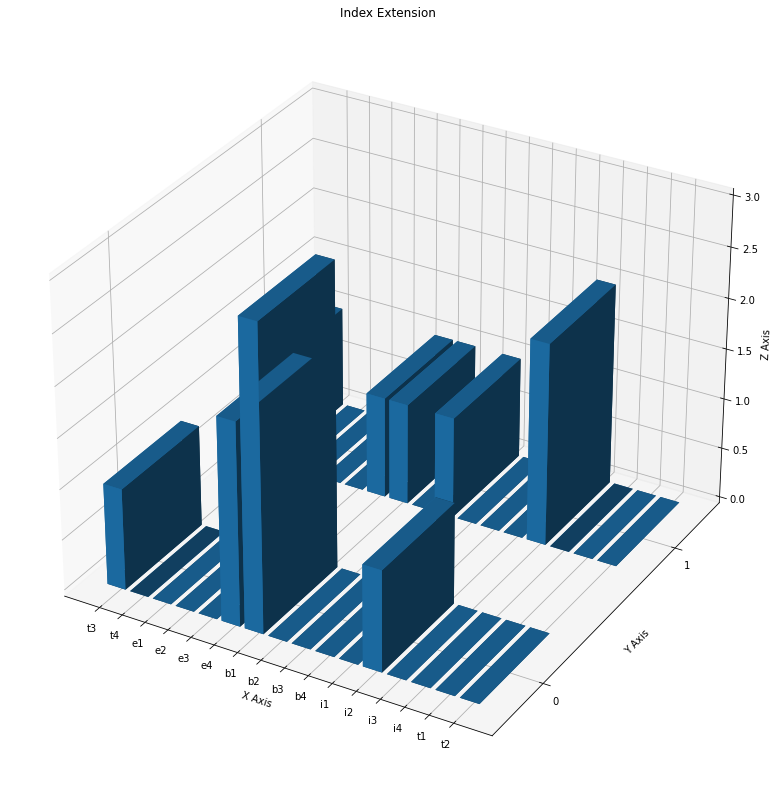

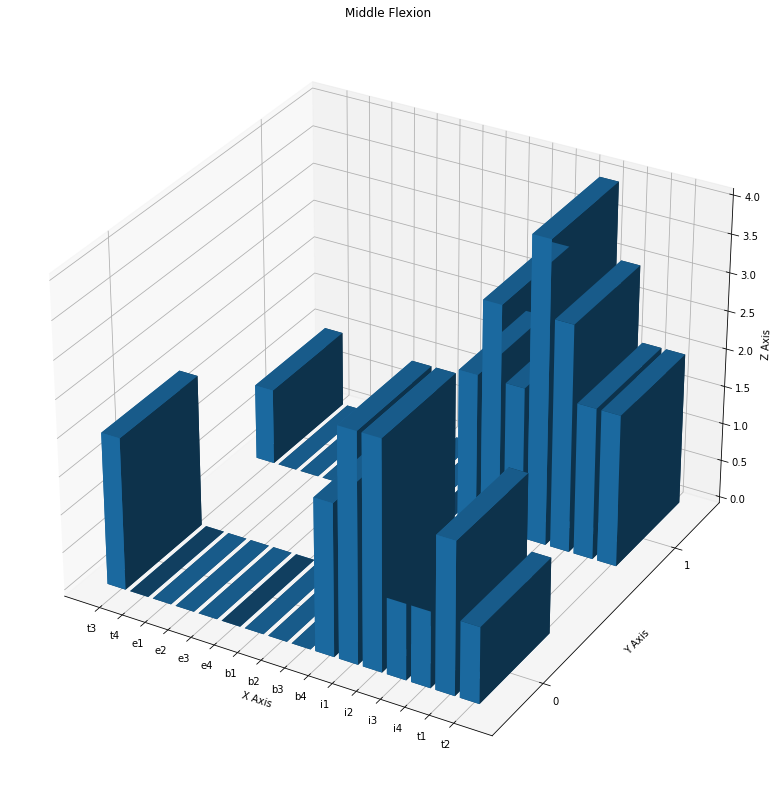

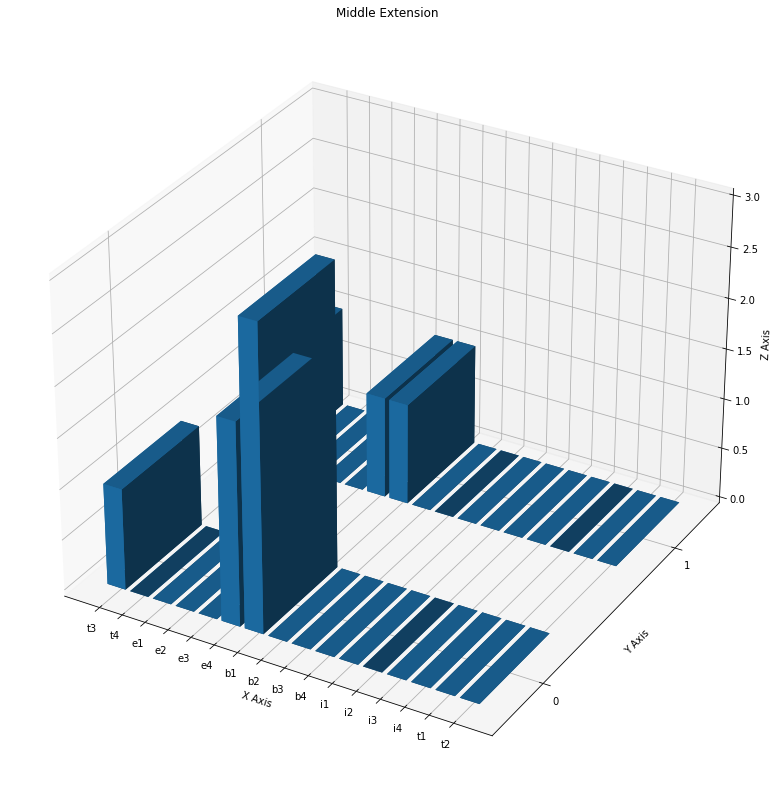

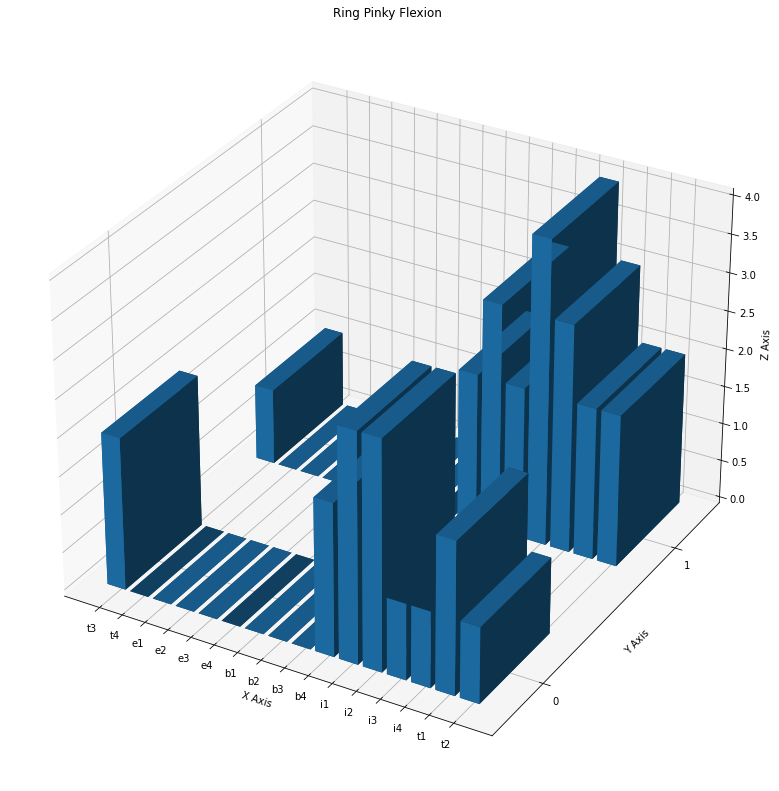

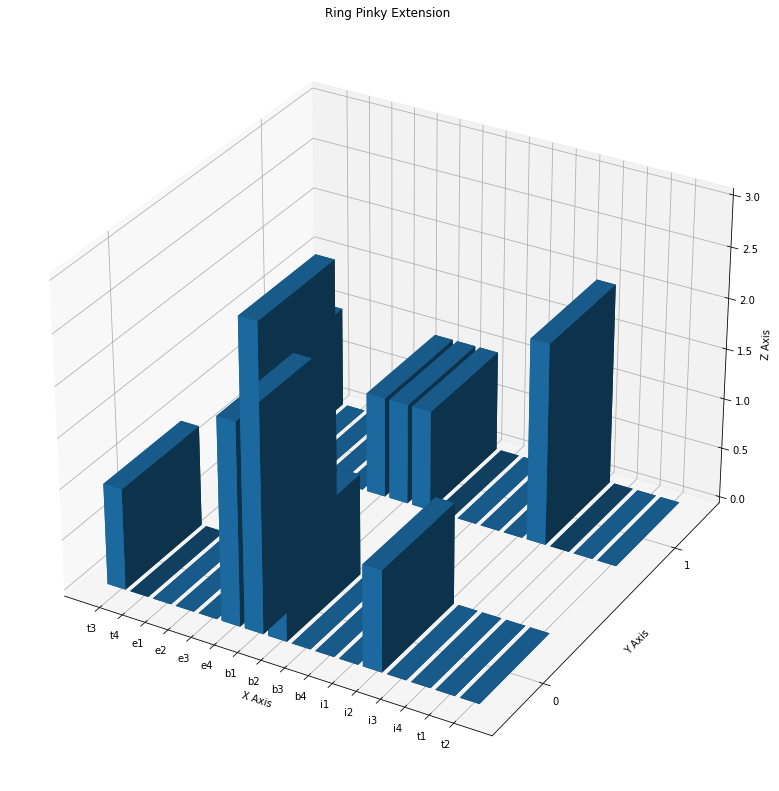

In [24]:
list_DOFs = [col for col in anat_func_DOFs]
for dof in list_DOFs:
    get_avail_map(dof)

In [25]:
avail_map_WrExt

array([[1., 1., 2., 2., 2., 2., 3., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 1., 1., 2., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:
def normalize_count_slice(matrix, selected_slice):
    slice_ = matrix[selected_slice]
    count = sum(i for i in slice_)
    return slice_/count
    
def normalize_matrix(matrix):
    for s in range(len(matrix)):
        matrix[s] = normalize_count_slice(matrix,s)
    return matrix


matrix_normalized = normalize_matrix(avail_map_WrExt)
matrix_normalized

array([[0.06666667, 0.06666667, 0.13333333, 0.13333333, 0.13333333,
        0.13333333, 0.2       , 0.06666667, 0.06666667, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.        , 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.22222222, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

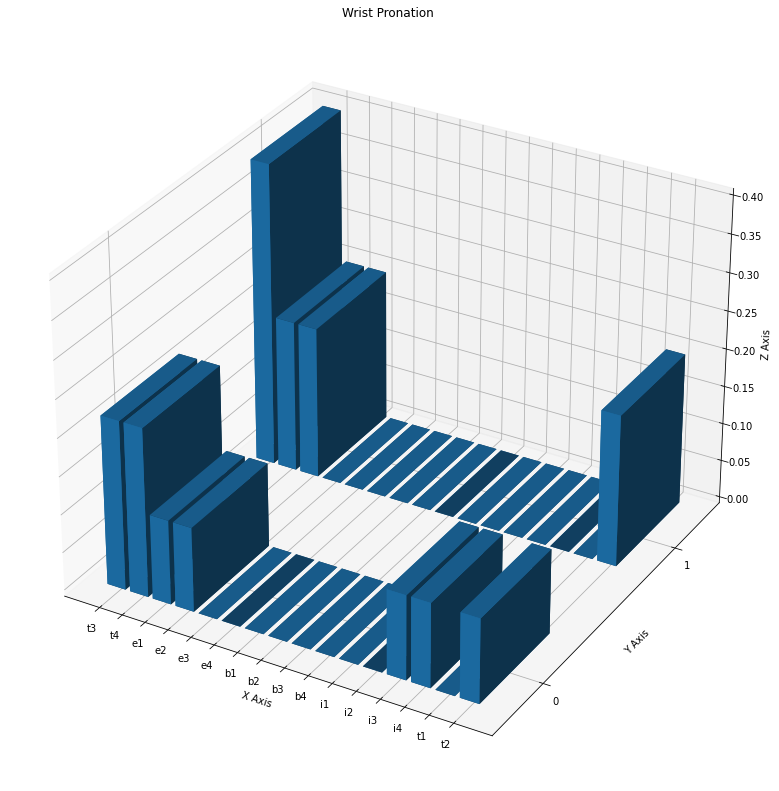

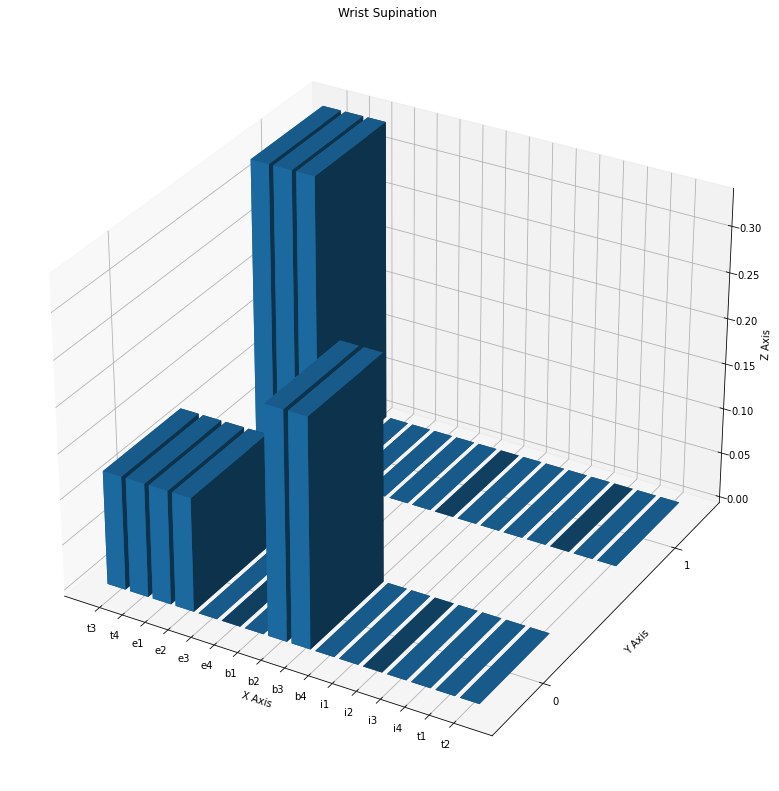

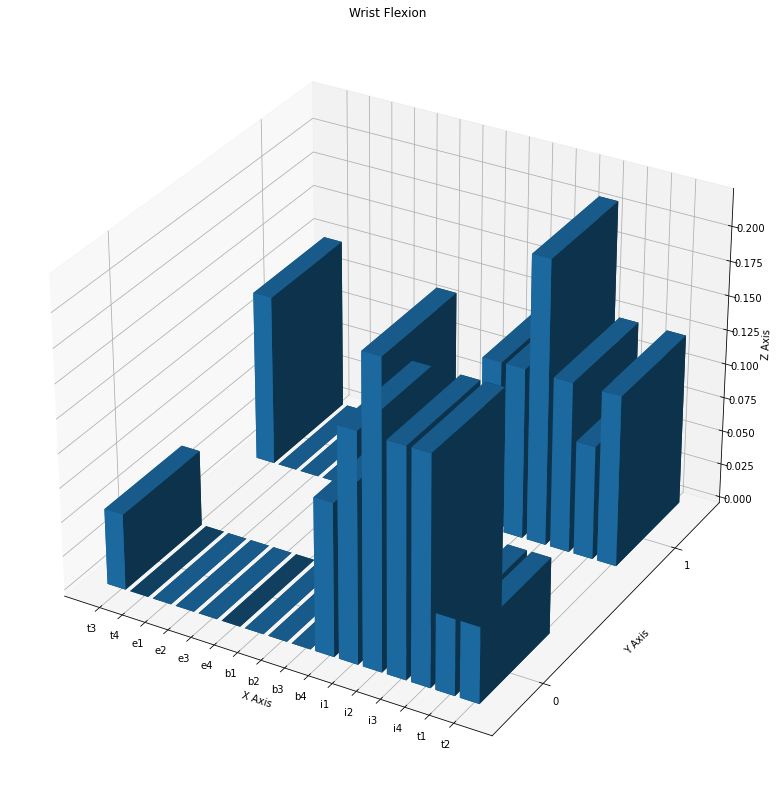

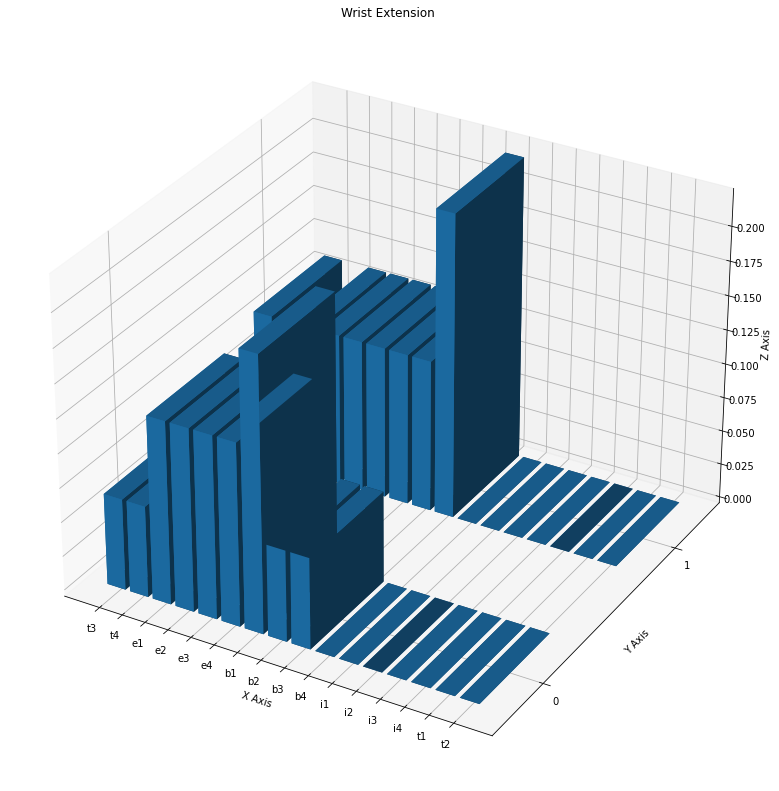

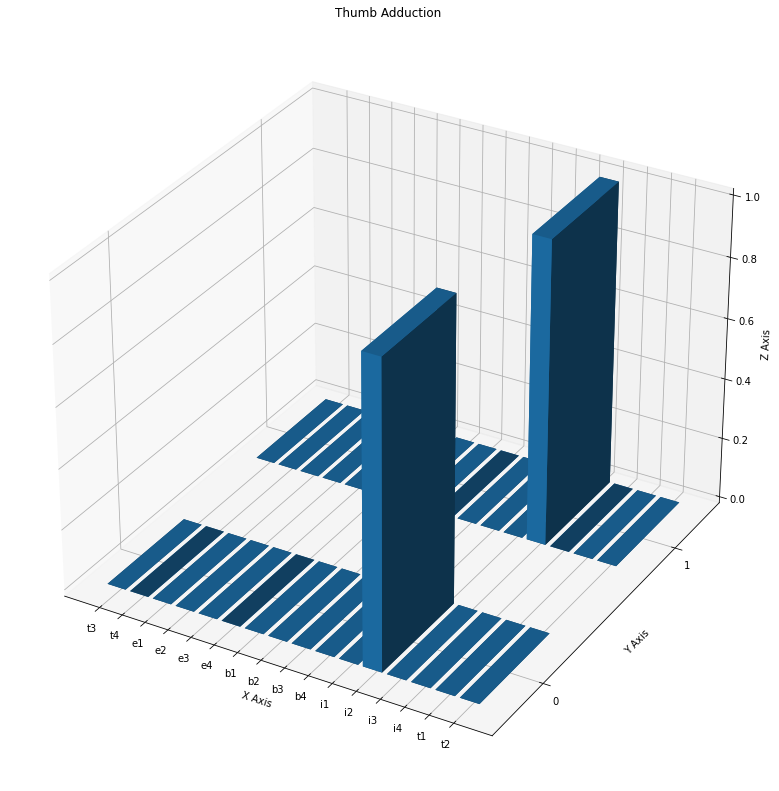

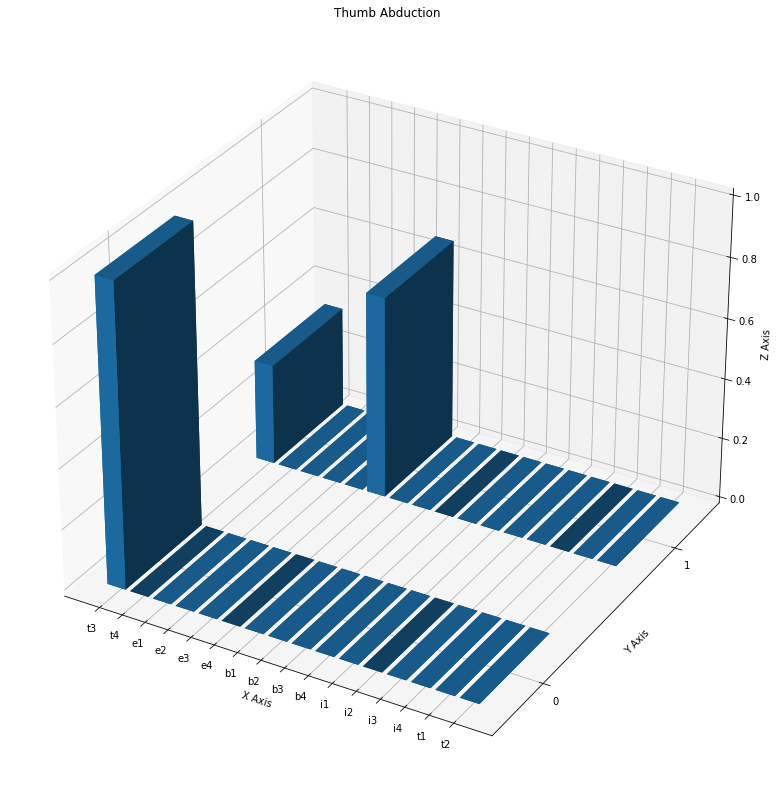

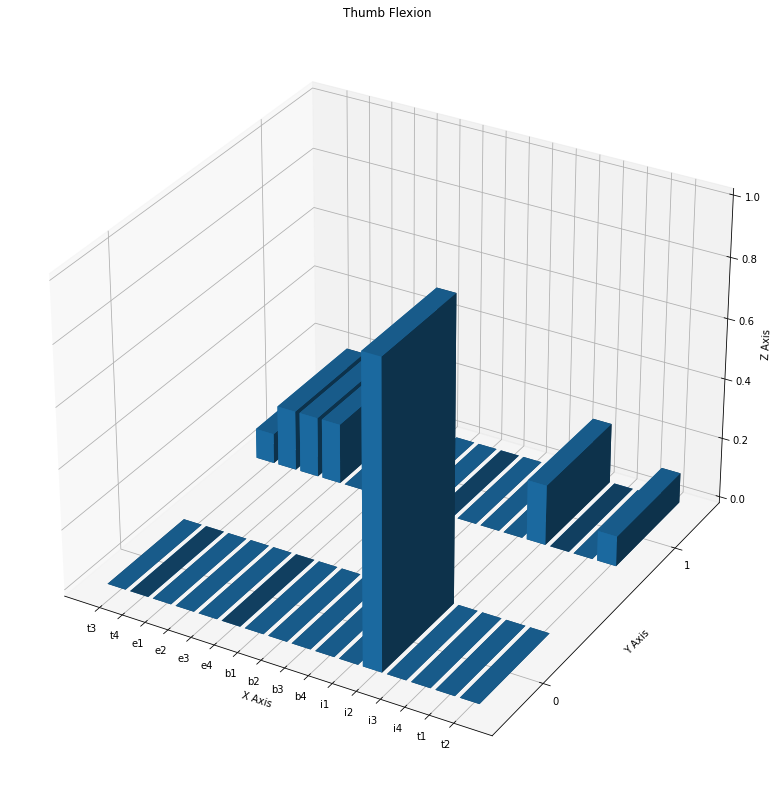

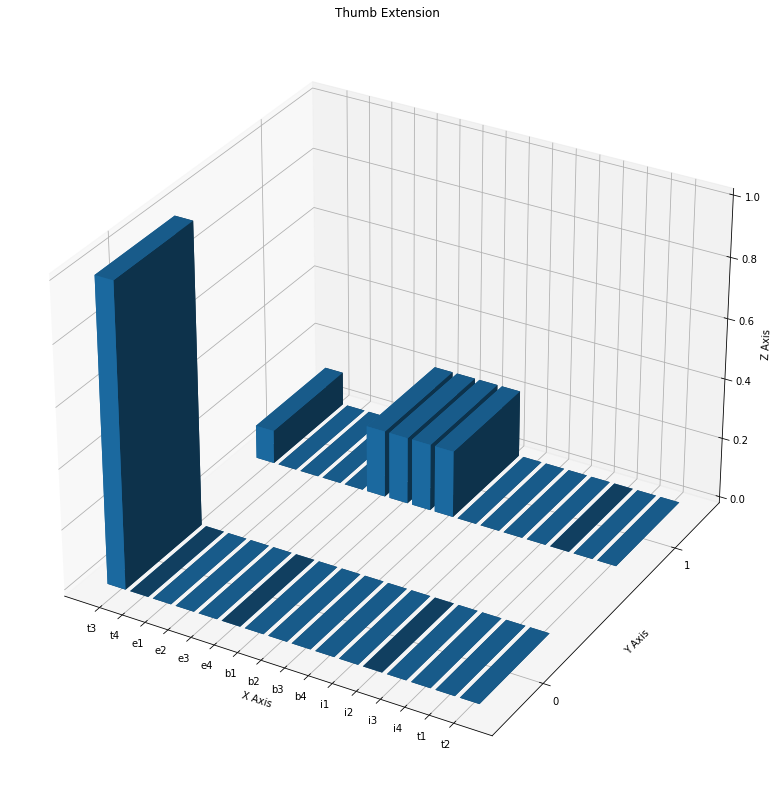

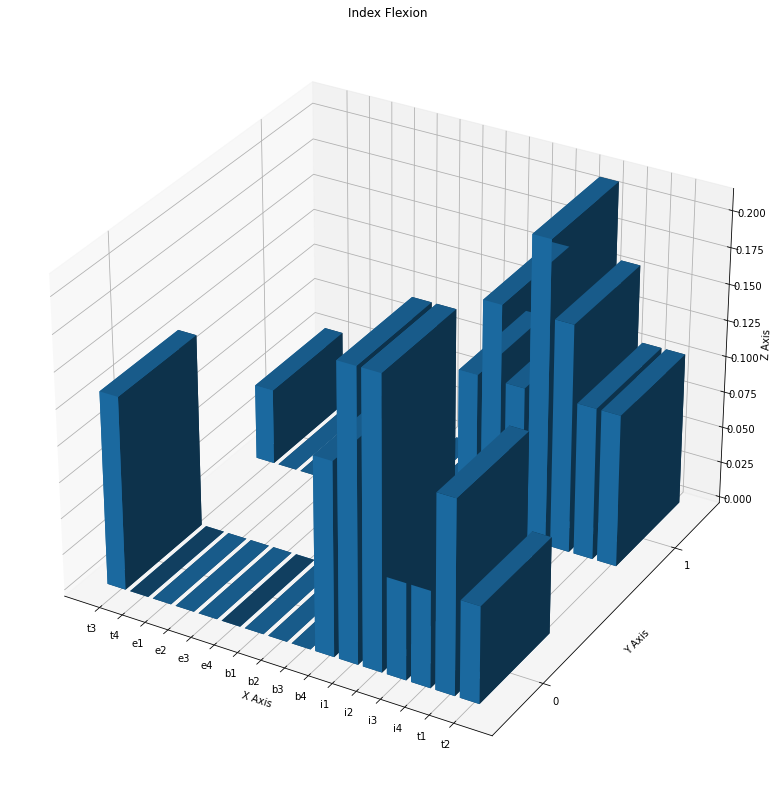

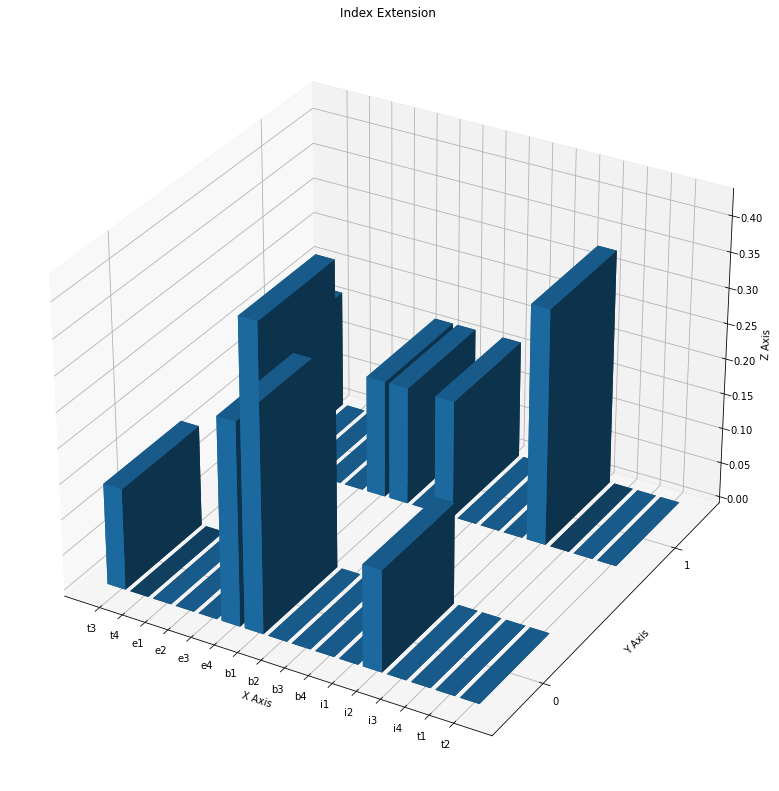

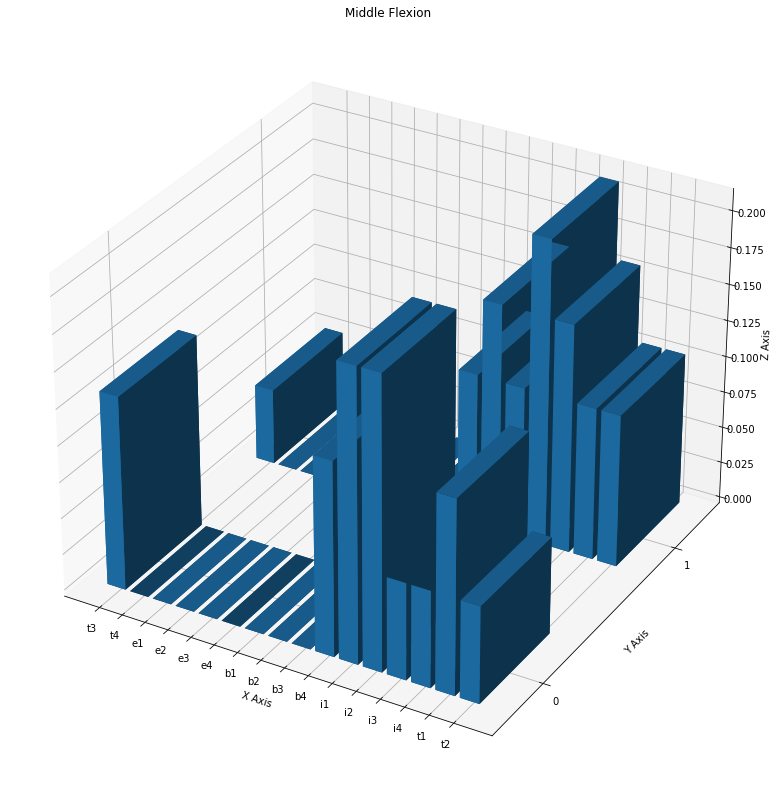

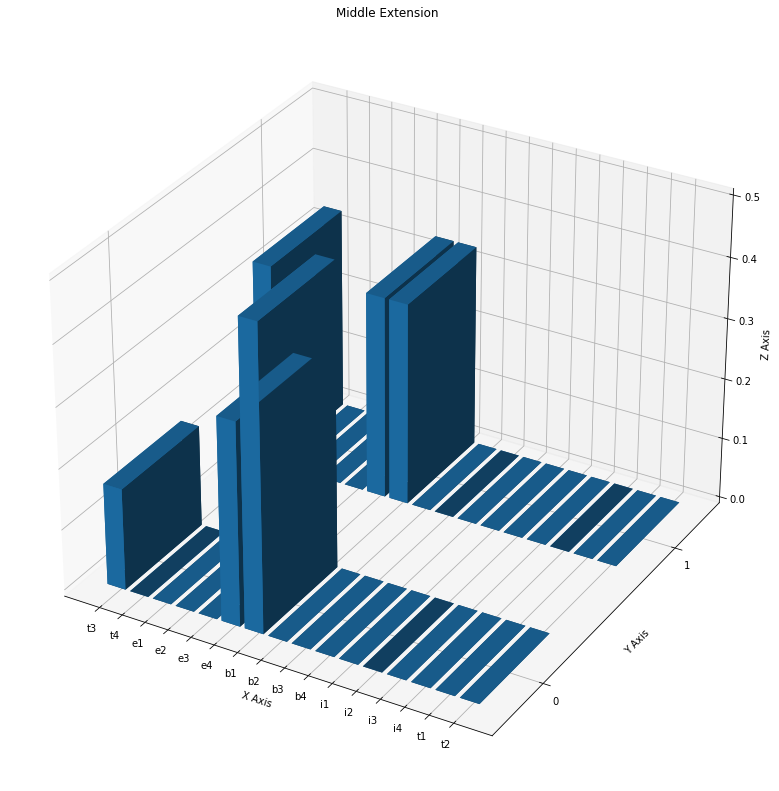

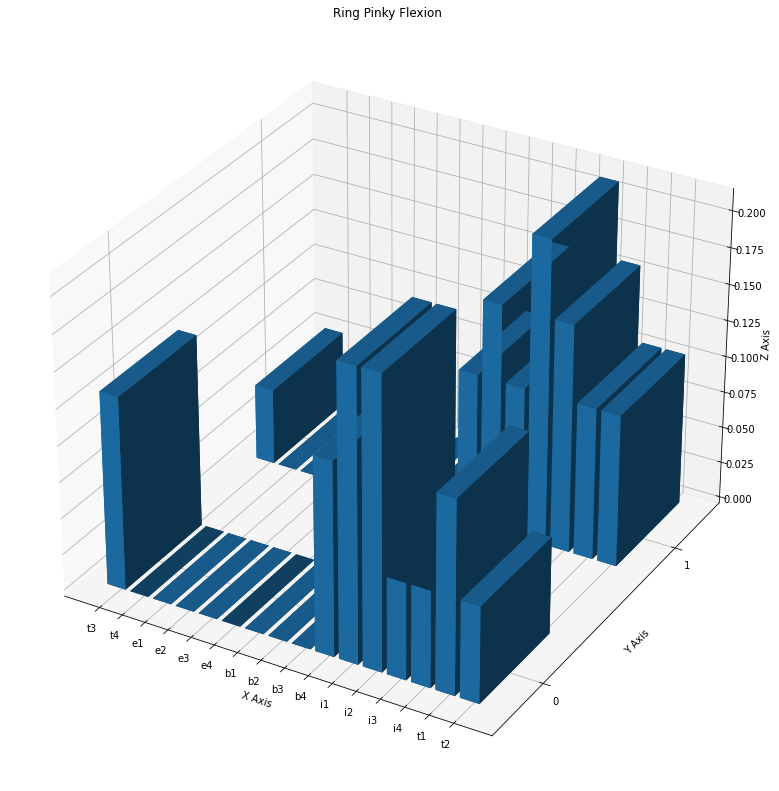

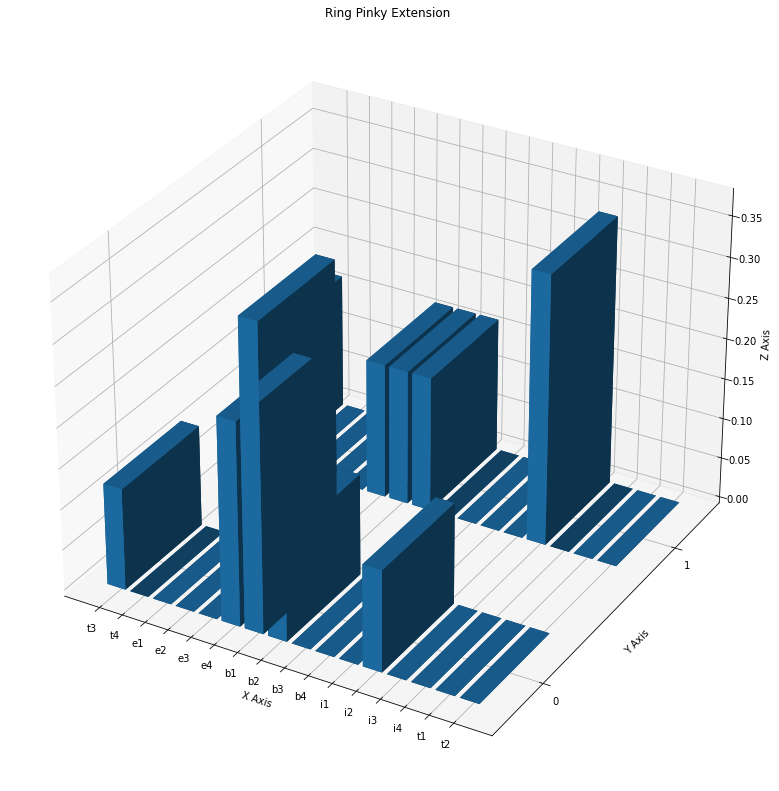

In [27]:
# Normalized plot

list_DOFs = [col for col in anat_func_DOFs]
for dof in list_DOFs:
    avail_matrix = numerical_availibility_map(dof)
    avail_matrix = normalize_matrix(avail_matrix)
    avail_df = matrix2df(avail_matrix)
    plot_avail_map(avail_df, dof)
    #print(avail_df.drop(1, axis=0))

In [28]:
# Normalized plot

list_DOFs = anat_func_DOFs.columns

ex_matrix = numerical_availibility_map('Wrist Extension')
dimension_matrix = ex_matrix.shape
full_matrix = np.zeros(dimension_matrix)

for dof in list_DOFs:
    avail_matrix = numerical_availibility_map(dof)
    avail_matrix = normalize_matrix(avail_matrix)
    full_matrix = full_matrix + avail_matrix
full_df = matrix2df(full_matrix)
#plot_avail_map(full_df, 'Availibility of normalized DOFs')
full_df.drop(1, axis=0)

t3        t4        e1        e2        e3        e4  \
axial position                                                               
0               3.303968  0.413889  0.369444  0.369444  0.133333  1.002381   

                      b1        b2        b3        b4        i1        i2  \
axial position                                                               
0               1.503571  0.441667  0.316667  0.511111  0.766667  3.090079   

                      i3        i4        t1        t2  
axial position                                          
0               0.477778  0.477778  0.455556  0.366667

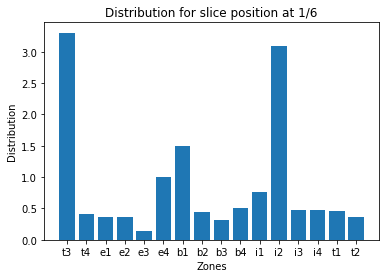

In [29]:
plt.bar(df.columns, full_matrix[0])
plt.xlabel('Zones')
plt.ylabel('Distribution')
plt.title('Distribution for slice position at 1/6')
plt.show()

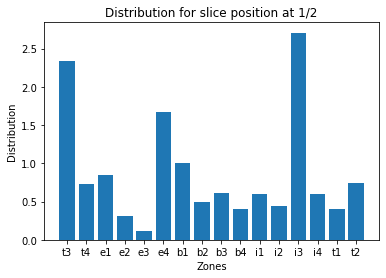

In [30]:
plt.bar(df.columns, full_matrix[1])
plt.xlabel('Zones')
plt.ylabel('Distribution')
plt.title('Distribution for slice position at 1/2')
plt.show()

## Try for each layer

In [31]:
def numerical_availibility_map2(selected_dof):
    # Initialize a dictionary to store counts of selected_dof at each (location, depth) pair
    occurrences = {}

    # Populate the dictionary with counts of selected_dof
    for location, row in DOFs_3D_map.iterrows():
        for depth, values in row.items():
            if selected_dof in values:
                occurrences[(location, depth)] = values.count(selected_dof)

    # Extract unique locations and depths to set up the grid
    #locations = sorted(df_flattened.index.unique())
    #depths = sorted(df_flattened.columns.unique())
    
    locations = DOFs_3D_map.index
    depths = DOFs_3D_map.columns

    # Create a 2D grid of counts for (location, depth) pairs
    count_matrix = np.zeros((len(locations), len(depths)))

    # Fill the count matrix
    for i, location in enumerate(locations):
        for j, depth in enumerate(depths):
            count_matrix[i, j] = occurrences.get((location, depth), 0)

    return count_matrix

avail_map_WrExt = numerical_availibility_map2('Wrist Extension')
avail_map_ThAbd = numerical_availibility_map2('Thumb Abduction')

print(avail_map_WrExt[0])
print(avail_map_WrExt[2])

[0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


In [51]:
def matrix2df2(matrix):
    old_columns = [n for n in range(16)]
    new_columns = [col for col in DOFs_3D_map]
    header_map = dict(zip(old_columns,new_columns))
    # Convert the flattened data dictionary to a DataFrame
    df_matrix = pd.DataFrame(matrix)  # Transpose to match original orientation
    df_matrix = df_matrix.join(DOFs_3D_map.index.to_frame(index=False))
    df_matrix = df_matrix.set_index(['location', 'depth'])
    df_matrix = df_matrix.rename(header_map, axis='columns')
    # Display the resulting flattened 2D DataFrame
    return df_matrix

matrix2df2(avail_map_WrExt)

t3   t4   e1   e2   e3   e4   b1   b2   b3   b4   i1   i2  \
location depth                                                                 
0.166667 deep     0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
         middle   0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
         surface  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
0.500000 deep     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
         middle   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
         surface  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   

                   i3   i4   t1   t2  
location depth                        
0.166667 deep     0.0  0.0  0.0  0.0  
         middle   0.0  0.0  0.0  0.0  
         surface  0.0  0.0  0.0  0.0  
0.500000 deep     0.0  0.0  0.0  0.0  
         middle   0.0  0.0  0.0  0.0  
         surface  0.0  0.0  0.0  0.0

In [52]:
def normalize_df(df):
    df_normalized = df.copy(deep=True)
    row_sums = df_normalized.sum(axis=1)
    row_sums.replace(0, 1, inplace=True)
    
    df_normalized = df_normalized.div(row_sums, axis=0)
    return df_normalized

normalize_df(matrix2df2(avail_map_WrExt))

t3        t4        e1        e2        e3        e4  \
location depth                                                                 
0.166667 deep     0.000000  0.000000  0.333333  0.333333  0.000000  0.000000   
         middle   0.000000  0.166667  0.166667  0.166667  0.166667  0.166667   
         surface  0.166667  0.000000  0.000000  0.000000  0.166667  0.166667   
0.500000 deep     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         middle   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         surface  0.125000  0.000000  0.125000  0.125000  0.125000  0.125000   

                        b1        b2        b3   b4   i1   i2   i3   i4   t1  \
location depth                                                                 
0.166667 deep     0.333333  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
         middle   0.166667  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
         surface  0.166667  0.166667  0.166667  0.0  0.0  0.0  0.0  0.0  0.0   
0.500000 deep     0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
         middle   0.000000  0.000000  1.000000  0.0  0.0  0.0  0.0  0.0  0.0   
         surface  0.125000  0.125000  0.125000  0.0  0.0  0.0  0.0  0.0  0.0   

                   t2  
location depth         
0.166667 deep     0.0  
         middle   0.0  
         surface  0.0  
0.500000 deep     0.0  
         middle   0.0  
         surface  0.0

In [53]:
list_DOFs = anat_func_DOFs.columns

ex_matrix = numerical_availibility_map2('Wrist Extension')
dimension_matrix = ex_matrix.shape
full_matrix = np.zeros(dimension_matrix)
full_df = matrix2df2(full_matrix)

for dof in list_DOFs:
    avail_matrix = numerical_availibility_map2(dof)
    avail_df = matrix2df2(avail_matrix)
    normalized_df = normalize_df(avail_df)
    full_df = full_df + normalized_df
full_df

t3        t4        e1        e2        e3        e4  \
location depth                                                                 
0.166667 deep     0.200000  0.200000  0.333333  0.333333  0.000000  0.000000   
         middle   0.500000  0.166667  0.166667  0.166667  0.166667  1.333333   
         surface  4.708333  0.500000  0.500000  0.500000  0.166667  1.083333   
0.500000 deep     0.200000  0.200000  0.200000  0.200000  0.000000  1.250000   
         middle   1.055556  0.250000  0.250000  0.250000  0.000000  1.250000   
         surface  3.686111  0.666667  0.791667  0.125000  0.125000  0.908333   

                        b1        b2        b3        b4        i1        i2  \
location depth                                                                 
0.166667 deep     3.333333  0.500000  0.500000  0.700000  0.700000  0.700000   
         middle   1.333333  0.500000  0.500000  0.000000  0.700000  4.066667   
         surface  1.083333  0.416667  0.166667  1.125000  1.125000  0.125000   
0.500000 deep     0.250000  0.250000  0.250000  0.666667  0.666667  0.666667   
         middle   0.250000  0.250000  1.750000  0.000000  0.444444  0.444444   
         surface  0.908333  0.325000  0.125000  0.861111  0.861111  0.111111   

                        i3        i4        t1        t2  
location depth                                            
0.166667 deep     0.900000  0.900000  0.500000  0.200000  
         middle   0.200000  0.200000  0.500000  0.500000  
         surface  0.125000  0.125000  0.125000  0.125000  
0.500000 deep     0.666667  0.666667  0.666667  0.200000  
         middle   3.638889  0.444444  0.333333  1.388889  
         surface  3.422222  0.861111  0.111111  0.111111

In [69]:
full_df.to_csv('distribution_map.csv', index=True)

In [70]:
distribution = pd.read_csv('distribution_map.csv')
print(distribution)

   location    depth        t3        t4        e1        e2        e3  \
0  0.166667     deep  0.200000  0.200000  0.333333  0.333333  0.000000   
1  0.166667   middle  0.500000  0.166667  0.166667  0.166667  0.166667   
2  0.166667  surface  4.708333  0.500000  0.500000  0.500000  0.166667   
3  0.500000     deep  0.200000  0.200000  0.200000  0.200000  0.000000   
4  0.500000   middle  1.055556  0.250000  0.250000  0.250000  0.000000   
5  0.500000  surface  3.686111  0.666667  0.791667  0.125000  0.125000   

         e4        b1        b2        b3        b4        i1        i2  \
0  0.000000  3.333333  0.500000  0.500000  0.700000  0.700000  0.700000   
1  1.333333  1.333333  0.500000  0.500000  0.000000  0.700000  4.066667   
2  1.083333  1.083333  0.416667  0.166667  1.125000  1.125000  0.125000   
3  1.250000  0.250000  0.250000  0.250000  0.666667  0.666667  0.666667   
4  1.250000  0.250000  0.250000  1.750000  0.000000  0.444444  0.444444   
5  0.908333  0.908333  0.325000